In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['image.cmap'] = 'gray'

In [2]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', use_bias=False, input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', use_bias=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        144       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2304      
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1254500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,257,958
Trainable params: 1,257,958
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, image):
        self.image = image
        self.cnn_1_results = []
        self.cnn_2_results = []

    def on_epoch_begin(self, epoch, logs=None):
        cnn_1_result = self.model.layers[0](self.image)
        cnn_2_result = self.model.layers[1](cnn_1_result)
        self.cnn_1_results.append(cnn_1_result)
        self.cnn_2_results.append(cnn_2_result)


In [6]:
sw = CustomCallback(test_x[0:1])
history = model.fit(train_x, train_y, epochs=5, callbacks=[sw])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1332 - accuracy: 0.9595
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0425 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0127 - accuracy: 0.9958


In [8]:
sw.cnn_1_results[0].shape

TensorShape([1, 28, 28, 16])

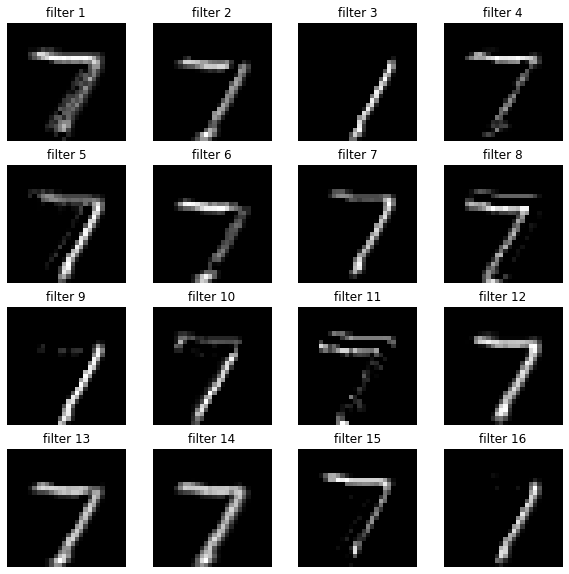

In [24]:
plt.figure(figsize=(10, 10))
for epoch, cnn_1_result in enumerate(sw.cnn_1_results):
    for i in range(cnn_1_result.shape[-1]):
        plt.subplot(4, 4, i+1)
        plt.imshow(cnn_1_result[0][:, :, i])
        plt.title(f"filter {i+1}")
        plt.axis('off')
    plt.savefig(f'cnn_1_{epoch+1}.png')
plt.show()        

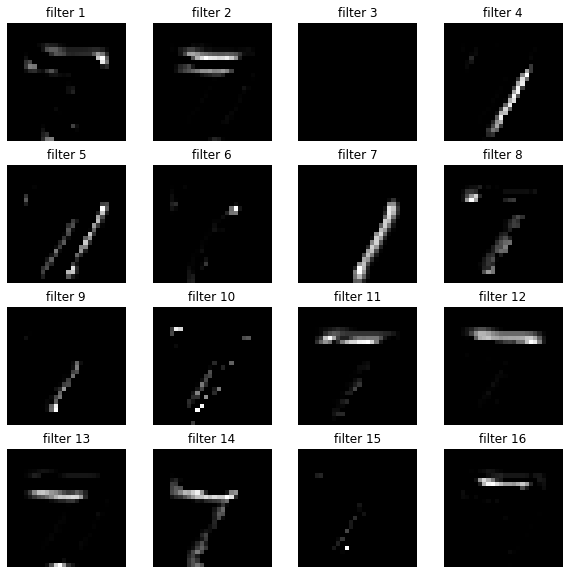

In [25]:
plt.figure(figsize=(10, 10))
for epoch, result in enumerate(sw.cnn_2_results):
    for i in range(result.shape[-1]):
        plt.subplot(4, 4, i+1)
        plt.imshow(result[0][:, :, i])
        plt.title(f"filter {i+1}")
        plt.axis('off')
    plt.savefig(f'cnn_2_{epoch+1}.png')
plt.show()  

In [27]:
import imageio
import glob

filenames = glob.glob("cnn_2*")
with imageio.get_writer('cnn_2.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)